# Optymalizacja

In [1]:
# %matplotlib notebook
import numpy as np 
import matplotlib.pyplot as plt
import scipy


Celem tego ćwiczenia jest porównanie wydajność różnych metod optymalizacji dostępnych w Pythonie. 

**Zadanie 1.**

Do tego rodzaju testów często wykorzystuje się funkcję Rosenbrocka:
$$
f(\mathbf{x})=\sum_{i=1}^{N-1}\left[100\left(x_{i+1}-x_i^2\right)^2+\left(1-x_i\right)^2\right] \quad \text { gdzie } \quad \mathbf{x}=\left(x_1, \ldots, x_N\right) \in \mathbb{R}^N
$$

W przypadku dwóch zmienny funkcja sprowadza się do postaci:
$$f(x, y)=(1-x)^2+100\left(y-x^2\right)^2$$

Zaimplementuj trójwymiarową (dwie zmienne) funkcję Rosenbrocka i przedstaw ją na wykresie (na osiach x i y zastosuj wartości z przedziału $[-10,10]$). 

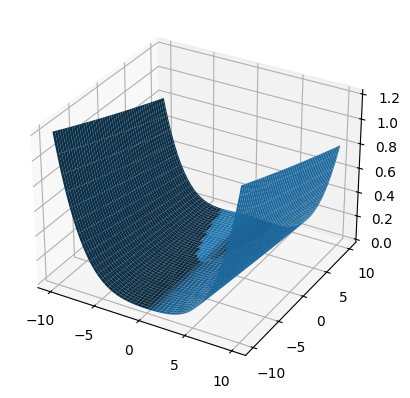

In [2]:
# W przypadku dwóch zmienny funkcja sprowadza się do postaci:
# $$f(x, y)=(1-x)^2+100\left(y-x^2\right)^2$$
# Zaimplementuj trójwymiarową (dwie zmienne) funkcję Rosenbrocka i przedstaw ją na wykresie (na osiach x i y zastosuj wartości z przedziału $[-10,10]$). 

def rosenbrock(x, y):
    return (1-x)**2 + 100*(y-x**2)**2

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()



**Zadanie 2.**

Inną popularną funkcją jest funkcja rastrigin
$$ f(\mathbf{x})=A n+\sum_{i=1}^n\left[x_i^2-A \cos \left(2 \pi x_i\right)\right]$$
gdzie $A=10$ oraz $x_i \in[-5.12,5.12]$

Zaimplementuj jej trójwymiarową (dwie zmienne) wersję i przedstaw ją na wykresie (na osiach x i y zastosuj wartości z przedziału $[-5.12,5.12]$). 

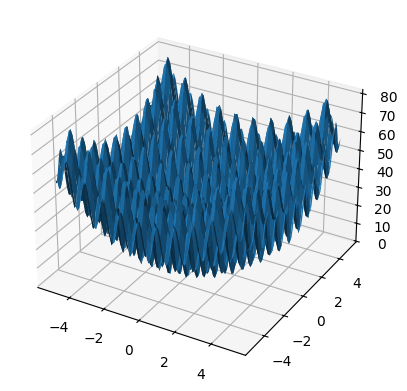

In [11]:
# **Zadanie 2.**

# Inną popularną funkcją jest funkcja rastrigin
# $$ f(\mathbf{x})=A n+\sum_{i=1}^n\left[x_i^2-A \cos \left(2 \pi x_i\right)\right]$$
# gdzie $A=10$ oraz $x_i \in[-5.12,5.12]$
# Zaimplementuj jej trójwymiarową (dwie zmienne) wersję i przedstaw ją na wykresie (na osiach x i y zastosuj wartości z przedziału $[-5.12,5.12]$). 

def rastrigin(x,y):
    A = 10
    return A*2 + x**2 - A*np.cos(2*np.pi*x) + y**2 - A*np.cos(2*np.pi*y)

x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()




**Zadanie 3**

Gdzie znajdują się minima lokalne i globalne powyższych funkcji?

**Zadanie 4.**

Zapoznaj się z dokumentacją modułu `optimize` z pakietu scipy i spróbuj znaleźć minima powyższych funkcji za pomocą kilku dostępnych w tym pakiecie metod (rozważ różne opcje funkcji `minimize` lub inne funkcje). Która z nich działa najszybciej (jeżeli jest taka możliwość, porównaj liczby iteracji lub czas działania)? Która daje dobre wyniki? Czy któraś z funkcji nie znajduje minimum? Zbadaj znaczenie parametrów.

In [12]:
# **Zadanie 4.**

# Zapoznaj się z dokumentacją modułu `optimize` z pakietu scipy i spróbuj znaleźć minima powyższych funkcji za pomocą kilku dostępnych w tym pakiecie metod (rozważ różne opcje funkcji `minimize` lub inne funkcje). Która z nich działa najszybciej (jeżeli jest taka możliwość, porównaj liczby iteracji lub czas działania)? Która daje dobre wyniki? Czy któraś z funkcji nie znajduje minimum? Zbadaj znaczenie parametrów.

from scipy.optimize import minimize, rosen


# Rosenbrock
x0 = np.array([0, 0])
res = minimize(rosen, x0, method='Nelder-Mead')
print(res)

res = minimize(rosen, x0, method='Powell')
print(res)

res = minimize(rosen, x0, method='CG')
print(res)

res = minimize(rosen, x0, method='BFGS')
print(res)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 3.6861769151759075e-10
             x: [ 1.000e+00  1.000e+00]
           nit: 79
          nfev: 146
 final_simplex: (array([[ 1.000e+00,  1.000e+00],
                       [ 1.000e+00,  9.999e-01],
                       [ 1.000e+00,  1.000e+00]]), array([ 3.686e-10,  1.636e-09,  2.022e-09]))
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.9721522630525295e-31
       x: [ 1.000e+00  1.000e+00]
     nit: 16
   direc: [[ 1.548e-02  3.245e-02]
           [ 1.336e-06  2.539e-06]]
    nfev: 423
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 2.0085382242752512e-11
       x: [ 1.000e+00  1.000e+00]
     nit: 21
     jac: [ 5.412e-06 -2.705e-06]
    nfev: 165
    njev: 55
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.8439915001532524e-11
        x: [ 1.000e+00  1.